In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()



# Crimes in Boston
## Records begin in June 14, 2015 and continue to September 3, 2018.

### Importing data

In [2]:
df = pd.read_csv('crime.csv', encoding = "ISO-8859-1")

### Checking & understanding file

In [3]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


### Choosing needed columns only

In [4]:
crimes = df[['OFFENSE_CODE_GROUP', 'YEAR','DAY_OF_WEEK', 'HOUR', 'STREET', ]]

In [5]:
crimes.head()

,OFFENSE_CODE_GROUP,YEAR,DAY_OF_WEEK,HOUR,STREET
0,Larceny,2018,Sunday,13,LINCOLN ST
1,Vandalism,2018,Tuesday,0,HECLA ST
2,Towed,2018,Monday,19,CAZENOVE ST
3,Investigate Property,2018,Monday,21,NEWCOMB ST
4,Investigate Property,2018,Monday,21,DELHI ST


### Checking which crimes are most popular & getting 10 top crimes

In [67]:
offense_groups = crimes['OFFENSE_CODE_GROUP'].value_counts()

In [70]:
#Crime groups count
offense_groups.count()

67

In [71]:
#Reduce to top 10 crime groups
offense_groups = offense_groups[:10]


In [72]:
offense_groups

Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18750
Other                              18075
Drug Violation                     16548
Simple Assault                     15826
Vandalism                          15415
Verbal Disputes                    13099
Towed                              11287
Name: OFFENSE_CODE_GROUP, dtype: int64

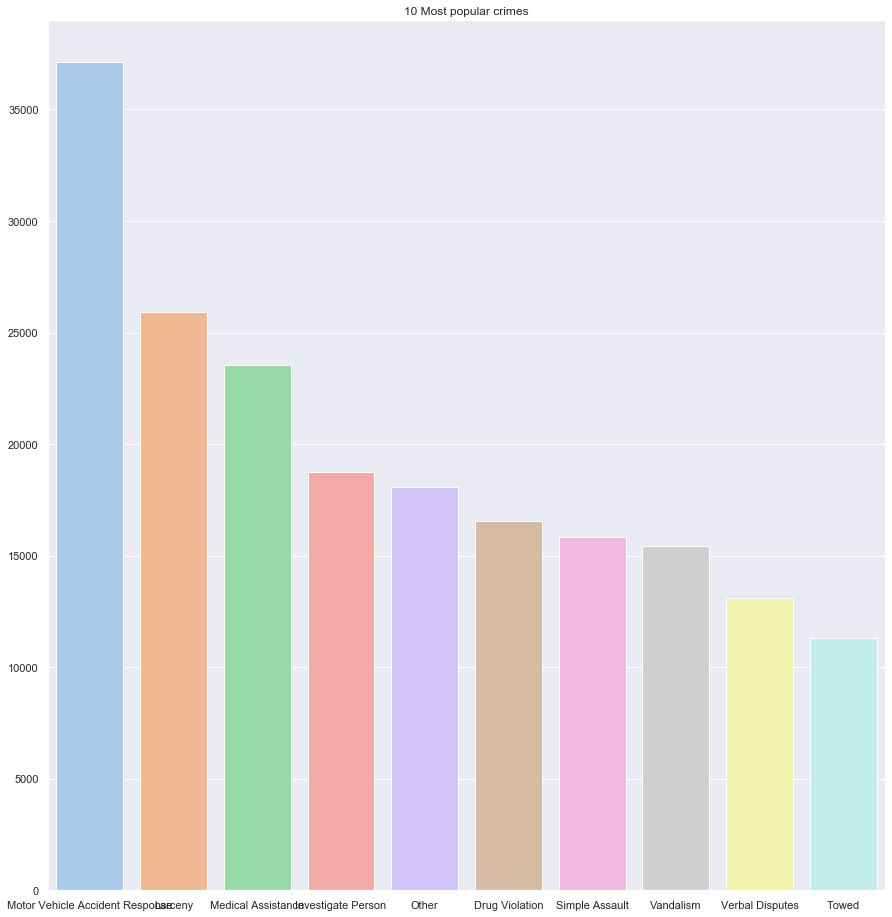

In [139]:
#Charting the data
plt.figure(figsize=(15,16))
g = sns.barplot(offense_groups.index, offense_groups.values, palette="pastel").set_title('10 Most popular crimes')

#Ideas - label charts
#Add names on each bar

### Checking crimes by days of the week 

In [74]:
crime_week_days = crimes['DAY_OF_WEEK'].value_counts()

In [18]:
crime_week_days

Friday       48495
Wednesday    46729
Thursday     46656
Tuesday      46383
Monday       45679
Saturday     44818
Sunday       40313
Name: DAY_OF_WEEK, dtype: int64

Text(0.5, 1.0, 'Crime count by week days')

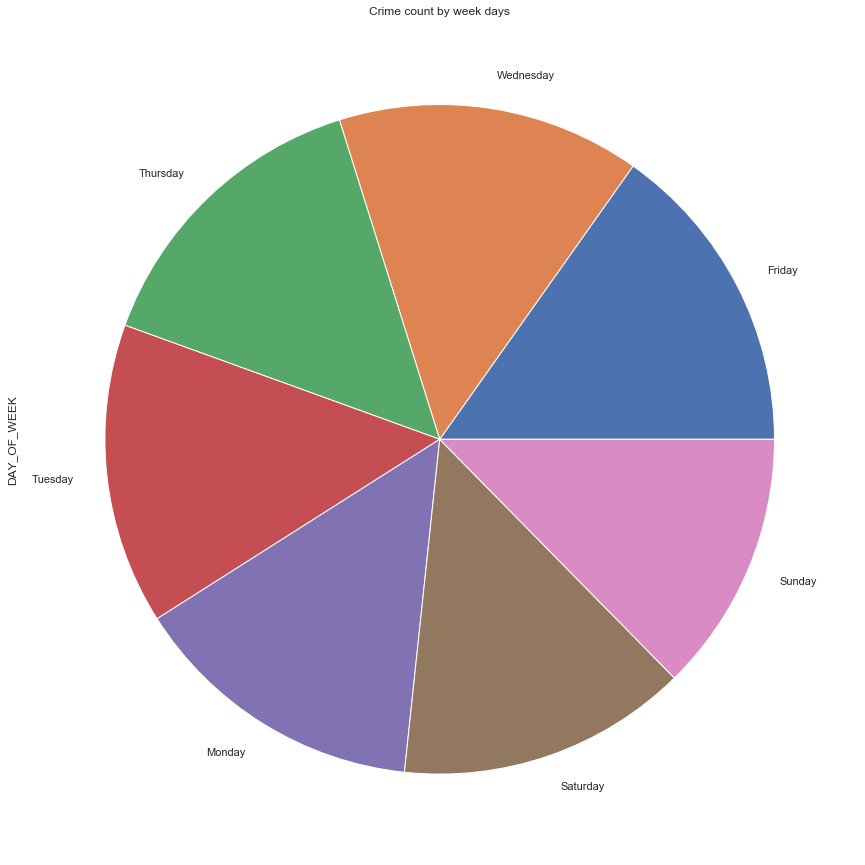

In [140]:
plt.figure(figsize=(15,16))
ax2 = crime_week_days.plot.pie()
ax2.set_title('Crime count by week days')
# Show quantities
# Show most popular day for cimes in dif color

### Finding times when most crime is commited
Time intervals

00:00 - 06:00

06:00 - 12:00

12:00 - 18:00

18:00 - 24:00

In [75]:
interval00to06 = crimes[crimes['HOUR'] < 6]
interval06to12 = crimes[(crimes['HOUR'] < 12) & (crimes['HOUR'] > 6)]
interval12to18 = crimes[(crimes['HOUR'] > 12) & (crimes['HOUR'] < 18)]
interval18 = crimes[crimes['HOUR'] > 18]

In [104]:
zerotosix = len(interval00to06.index)
sixtotwelve = len(interval06to12.index)
twelwetosix = len(interval12to18.index)
sixtomid = len(interval18.index)
hourslsit = [zerotosix,sixtotwelve, twelwetosix,sixtomid]


interval_series = pd.Series(hourslsit)
index_ = ['00:00 to 06:00','06:00 to 12:00', '12:00 to 18:00', '18:00 to 24:00']
interval_series.index = index_

In [105]:
interval_series

00:00 to 06:00    43376
06:00 to 12:00    69428
12:00 to 18:00    91191
18:00 to 24:00    71071
dtype: int64

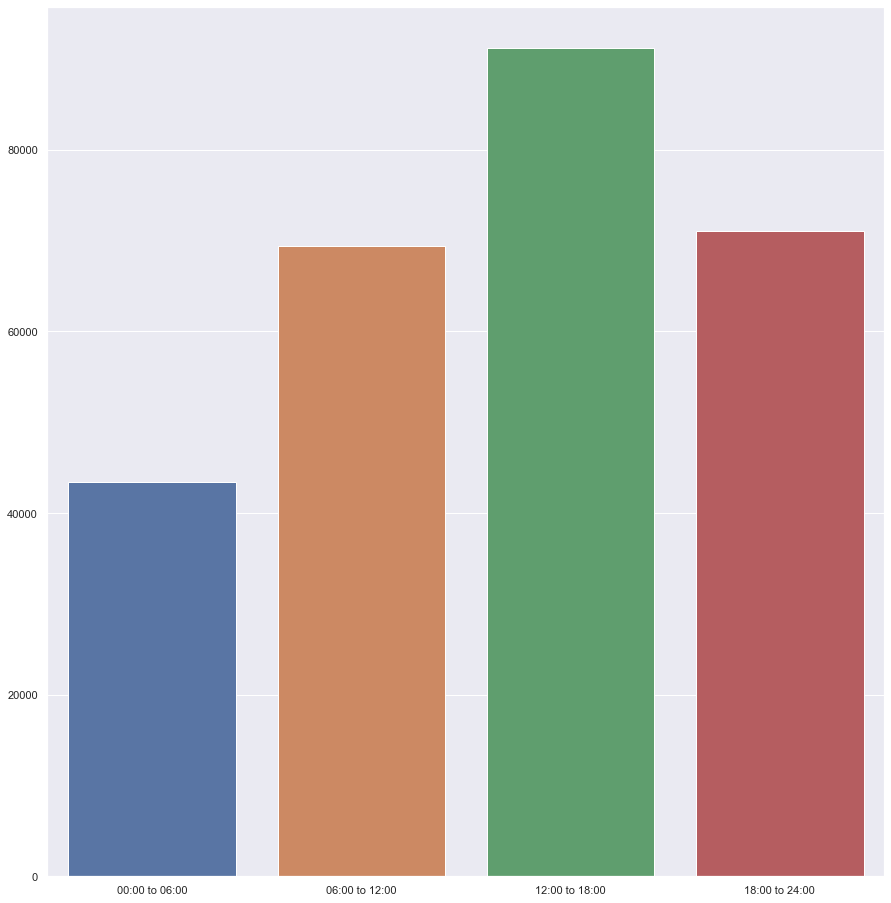

In [151]:
plt.figure(figsize=(15,16))
g = sns.barplot(interval_series.index, interval_series.values)

## Crimes by street

In [114]:
dangerous_streets = crimes['STREET'].value_counts()
dangerous_streets

WASHINGTON ST     14194
BLUE HILL AVE      7794
BOYLSTON ST        7221
DORCHESTER AVE     5149
TREMONT ST         4796
                  ...  
SUPERIOR              1
DANIA TER             1
HUMBOLDT PL           1
PALMER                1
LONDON                1
Name: STREET, Length: 4657, dtype: int64

In [127]:
dangerous_streets.describe()

count     4657.000000
mean        66.180374
std        350.219857
min          1.000000
25%          2.000000
50%         11.000000
75%         41.000000
max      14194.000000
Name: STREET, dtype: float64

### Finding times when most crime is commited per HOUR

In [199]:
crime_hours = crimes['HOUR'].value_counts()
crime_hours

17    20763
18    20302
16    19871
12    18679
19    17588
14    17189
13    16846
15    16522
11    16448
10    16347
20    15850
0     15106
9     14740
21    14111
8     13043
22    12926
23    10596
1      9269
7      8850
2      7693
6      5026
3      4589
4      3408
5      3311
Name: HOUR, dtype: int64

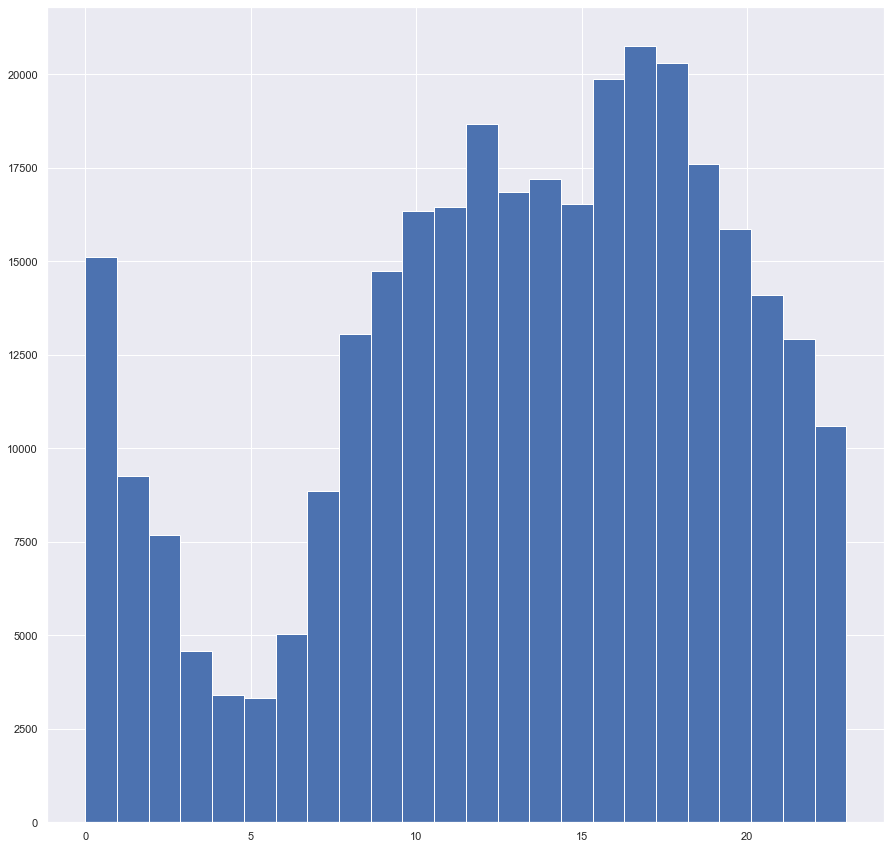

In [207]:
plt.figure(figsize=(15,15))
#sns.barplot(crime_hours.index, crime_hours.values )
crimes['HOUR'].hist(bins=24)
#sns.distplot(crimes['HOUR'], bins=26)

## Top 10 crimes at night between 23:00 - 06:00

In [175]:
mask1 = crimes[crimes['HOUR'] >= 23]
mask2 = crimes[crimes['HOUR'] < 6]
df_all_rows = pd.concat([mask1, mask2])


In [181]:
new_offense_groups = df_all_rows['OFFENSE_CODE_GROUP'].value_counts()
new_offense_groups = new_offense_groups[:10]

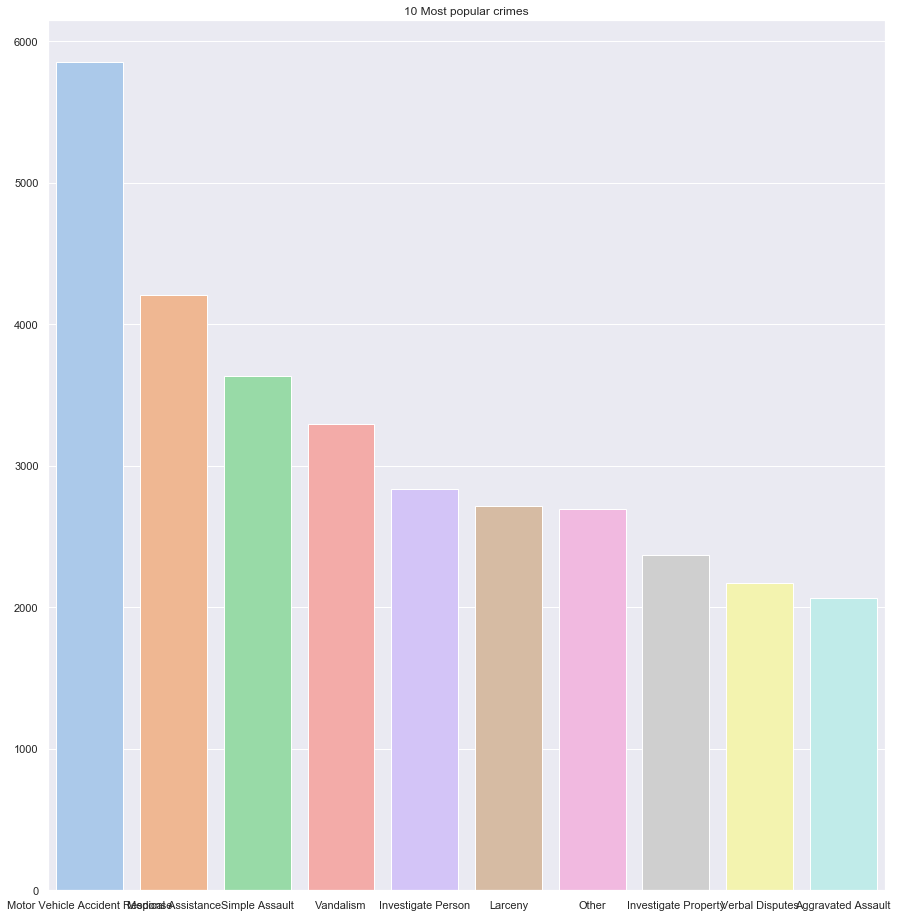

In [182]:
plt.figure(figsize=(15,16))
g = sns.barplot(new_offense_groups.index, new_offense_groups.values, palette="pastel").set_title('10 Most popular crimes')

### Box plot - Crimes per days of week and their times

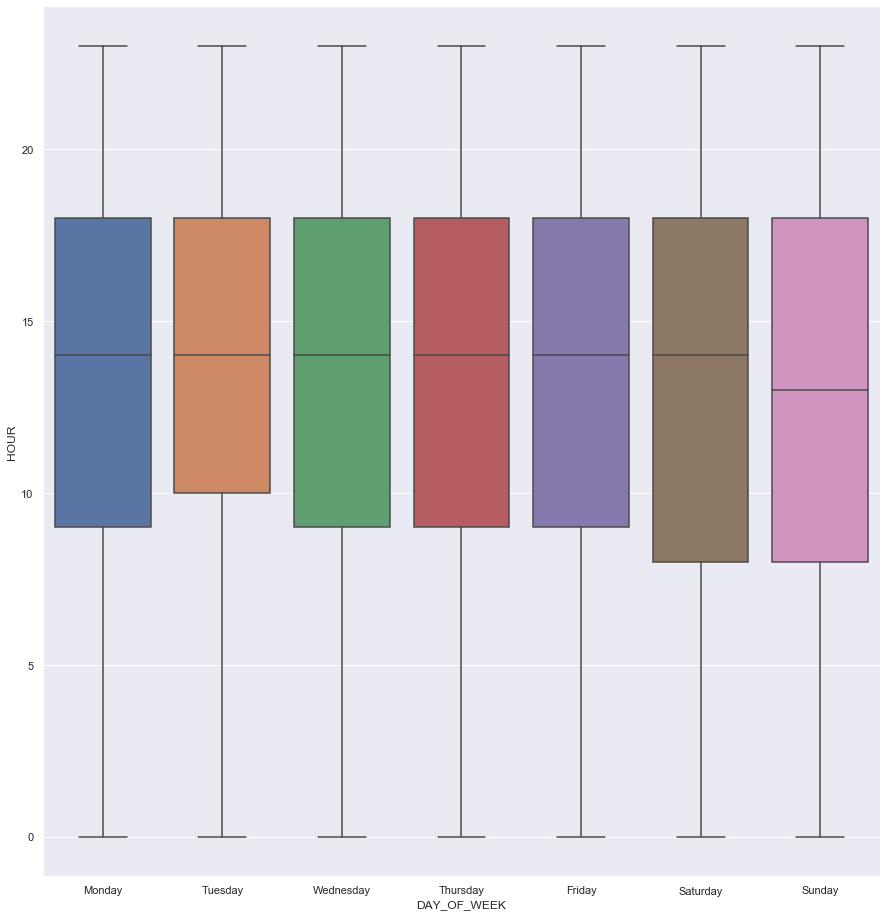

In [216]:
plt.figure(figsize=(15,16))
sns.boxplot(x = crimes['DAY_OF_WEEK'], y=crimes['HOUR'], order=["Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday","Sunday" ])